<a href="https://colab.research.google.com/github/755224unizar/TFG_Notes/blob/main/DataLoader_%26_Net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

torch.Size([22, 750, 15])


(-0.5, 749.5, 21.5, -0.5)

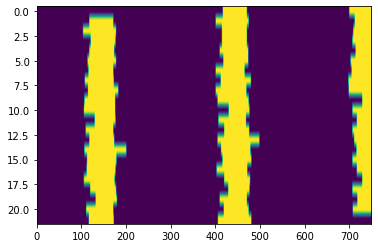

In [ ]:
# DataLoader para imágenes procesadas
 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import torch
import scipy.io
import torch
 
myfile= '/content/drive/MyDrive/Matrices procesadas/Matrices_A0001.mat' 
data = scipy.io.loadmat(myfile)
X = data['matrices']
X = torch.tensor(X, dtype=torch.float32)
print(X.shape)
plt.imshow(X[:,:,13])
plt.axis('tight')

In [ ]:
# Creamos clase para el dataset
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math
import scipy.io
import os

# Estos son los diagnósticos que servían para puntuar en el PhysioNet, pero en el dataset hay mas

tabla = {270492004:0, 164889003:1, 164890007:2, 426627000:3, 
         713427006:4, 713426002:5, 445118002:6, 39732003:7, 
         164909002:8, 251146004:9, 698252002:10, 10370003:11,
         284470004:12, 427172004:13, 164947007:14, 111975006:15,
         164917005:16, 47665007:17, 59118001:18, 427393009:19, 
         426177001:20, 426783006:21, 427084000:22, 63593006:23,
         164934002:24, 59931005:25, 17338001:26}

# Estos son todos los diagnósticos que pueden aparecer en el dataset

tabla_completa = {270492004:0, 195042002:1, 164951009:2, 426664006:3, 57054005:4, 413444003:5,
                  426434006:6, 54329005:7, 251173003:8, 164889003:9, 195080001:10, 164890007:11,
                  195126007:12, 251268003:13, 713422000:14, 29320008:15, 233917008:16, 251170000:17,
                  74615001:18, 426627000:19, 6374002: 20, 698247007:21, 426749004:22, 413844008:23,
                  27885002:24, 713427006:25, 204384007:26, 53741008:27, 77867006:28, 82226007:29,
                  428417006:30, 13640000:31, 84114007:32, 368009:33, 251259000:34, 49260003:35,
                  251120003:36, 713426002:37, 251200008:38, 425419005:39, 704997005:40, 426995002:41,
                  251164006:42, 426648003:43, 425623009:44, 445118002:45, 253352002:46, 67741000119109:47,
                  446813000:48, 39732003:49, 164909002:50, 445211001:51, 164873001:52, 370365005:53,
                  251146004:54, 54016002:55, 164865005:56, 164861001:57, 698252002:58, 428750005:59,
                  164867002:60, 10370003:61, 251182009:62, 282825002:63, 67198005:64, 425856008:65,
                  284470004:66, 427172004:67, 17338001:68, 164947007:69, 111975006:70, 164917005:71,
                  164921003:72, 314208002:73, 253339007:74, 446358003:75, 47665007:76, 59118001:77,
                  89792004:78, 55930002:79, 49578007:80, 65778007:81, 427393009:82, 426177001:83,
                  60423000:84, 426783006:85, 427084000:86, 429622005:87, 164931005:88, 164930006:89,
                  251168009:90, 63593006:91, 426761007:92, 251139008:93, 164934002:94, 59931005:95,
                  266257000:96, 164937009:97, 11157007:98, 164884008:99, 75532003:100, 81898007:101,
                  164896001:102, 111288001:103, 266249003:104, 251266004:105, 195060002:106, 164895002:107,
                  251180001:108, 195101003:109, 74390002:110}

def convertCatToLabel(y):
  labels = np.zeros((1, 111), dtype=np.int64)
  for i in range(y.shape[1]):
    labels[0,tabla_completa[int(y[0,i])]]=1
  return labels

class ECG_Dataset(Dataset):

  def __init__(self):
    # data loading
    path = '/content/drive/MyDrive/TFG/Tensores_procesados'
    # Generamos lista iterable de ficheros
    files = []
    with open('/content/drive/MyDrive/TFG/Tensores_procesados/NombresFicheros.txt', 'r') as texto:
      lines = texto.readlines()
      for l in lines:
        as_list = l.split("\n")
        files.append(as_list[0])
        
      print(files)
    
    x_list = []
    y_list = []
    
    
    for file in files:         # Recorro los ficheros almacenando los tensores y las etiquetas
      xy = scipy.io.loadmat(path+'/'+file)
      print(file)
      matrices = xy['tensor']
      diagnostico = (xy['diagnostico'])
      x_list.append(matrices)        
      y_list.append(convertCatToLabel(diagnostico))
      
    self.x = x_list
    self.y = y_list
    self.n_samples = len(x_list)
    

  def __getitem__(self, index):
    return self.x[index] , self.y[index]

  def __len__(self):
    return self.n_samples


dataset = ECG_Dataset()
dataloader = DataLoader(dataset=dataset, batch_size=4, shuffle=True, num_workers=2)

dataIterator = iter(dataloader)
data = dataIterator.next()    # De momento falla porque los tensores no son de la mismas dimensiones
x, y = data
print(features, labels)







['Matrices_A0001.mat', 'Matrices_A0002.mat', 'Matrices_A0003.mat', 'Matrices_A0004.mat', 'Matrices_A0005.mat', 'Matrices_A0006.mat', 'Matrices_A0007.mat', 'Matrices_A0008.mat', 'Matrices_A0009.mat', 'Matrices_A0010.mat', 'Matrices_A0011.mat', 'Matrices_A0012.mat', 'Matrices_A0013.mat', 'Matrices_A0014.mat', 'Matrices_A0015.mat', 'Matrices_A0016.mat', 'Matrices_A0017.mat', 'Matrices_A0018.mat', 'Matrices_A0019.mat', 'Matrices_A0020.mat', 'Matrices_A0021.mat', 'Matrices_A0022.mat', 'Matrices_A0023.mat', 'Matrices_A0024.mat', 'Matrices_A0025.mat', 'Matrices_A0026.mat', 'Matrices_A0027.mat', 'Matrices_A0028.mat', 'Matrices_A0029.mat', 'Matrices_A0030.mat', 'Matrices_A0031.mat', 'Matrices_A0032.mat', 'Matrices_A0033.mat', 'Matrices_A0034.mat', 'Matrices_A0035.mat', 'Matrices_A0036.mat', 'Matrices_A0037.mat', 'Matrices_A0038.mat', 'Matrices_A0039.mat', 'Matrices_A0040.mat', 'Matrices_A0041.mat', 'Matrices_A0042.mat', 'Matrices_A0043.mat', 'Matrices_A0044.mat', 'Matrices_A0045.mat', 'Matrices

RuntimeError: ignored

['Matrices_A0001.mat', 'Matrices_A0002.mat', 'Matrices_A0003.mat', 'Matrices_A0004.mat', 'Matrices_A0005.mat', 'Matrices_A0006.mat', 'Matrices_A0007.mat', 'Matrices_A0008.mat', 'Matrices_A0009.mat', 'Matrices_A0010.mat', 'Matrices_A0011.mat', 'Matrices_A0012.mat', 'Matrices_A0013.mat', 'Matrices_A0014.mat', 'Matrices_A0015.mat', 'Matrices_A0016.mat', 'Matrices_A0017.mat', 'Matrices_A0018.mat', 'Matrices_A0019.mat', 'Matrices_A0020.mat', 'Matrices_A0021.mat', 'Matrices_A0022.mat', 'Matrices_A0023.mat', 'Matrices_A0024.mat', 'Matrices_A0025.mat', 'Matrices_A0026.mat', 'Matrices_A0027.mat', 'Matrices_A0028.mat', 'Matrices_A0029.mat', 'Matrices_A0030.mat', 'Matrices_A0031.mat', 'Matrices_A0032.mat', 'Matrices_A0033.mat', 'Matrices_A0034.mat', 'Matrices_A0035.mat', 'Matrices_A0036.mat', 'Matrices_A0037.mat', 'Matrices_A0038.mat', 'Matrices_A0039.mat', 'Matrices_A0040.mat', 'Matrices_A0041.mat', 'Matrices_A0042.mat', 'Matrices_A0043.mat', 'Matrices_A0044.mat', 'Matrices_A0045.mat', 'Matrices

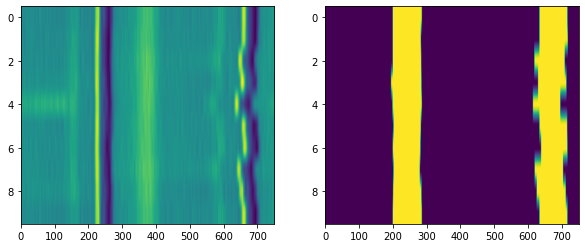

In [ ]:
# Versión tomando un numero fijo y de ventanas temporales por muestra

import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math
import scipy.io
import os
import math
import matplotlib.pyplot as plt

# Estos son los diagnósticos que servían para puntuar en el PhysioNet, pero en el dataset hay mas

tabla = {270492004:0, 164889003:1, 164890007:2, 426627000:3, 
         713427006:4, 713426002:5, 445118002:6, 39732003:7, 
         164909002:8, 251146004:9, 698252002:10, 10370003:11,
         284470004:12, 427172004:13, 164947007:14, 111975006:15,
         164917005:16, 47665007:17, 59118001:18, 427393009:19, 
         426177001:20, 426783006:21, 427084000:22, 63593006:23,
         164934002:24, 59931005:25, 17338001:26}

# Estos son todos los diagnósticos que pueden aparecer en el dataset

tabla_completa = {270492004:0, 195042002:1, 164951009:2, 426664006:3, 57054005:4, 413444003:5,
                  426434006:6, 54329005:7, 251173003:8, 164889003:9, 195080001:10, 164890007:11,
                  195126007:12, 251268003:13, 713422000:14, 29320008:15, 233917008:16, 251170000:17,
                  74615001:18, 426627000:19, 6374002: 20, 698247007:21, 426749004:22, 413844008:23,
                  27885002:24, 713427006:25, 204384007:26, 53741008:27, 77867006:28, 82226007:29,
                  428417006:30, 13640000:31, 84114007:32, 368009:33, 251259000:34, 49260003:35,
                  251120003:36, 713426002:37, 251200008:38, 425419005:39, 704997005:40, 426995002:41,
                  251164006:42, 426648003:43, 425623009:44, 445118002:45, 253352002:46, 67741000119109:47,
                  446813000:48, 39732003:49, 164909002:50, 445211001:51, 164873001:52, 370365005:53,
                  251146004:54, 54016002:55, 164865005:56, 164861001:57, 698252002:58, 428750005:59,
                  164867002:60, 10370003:61, 251182009:62, 282825002:63, 67198005:64, 425856008:65,
                  284470004:66, 427172004:67, 17338001:68, 164947007:69, 111975006:70, 164917005:71,
                  164921003:72, 314208002:73, 253339007:74, 446358003:75, 47665007:76, 59118001:77,
                  89792004:78, 55930002:79, 49578007:80, 65778007:81, 427393009:82, 426177001:83,
                  60423000:84, 426783006:85, 427084000:86, 429622005:87, 164931005:88, 164930006:89,
                  251168009:90, 63593006:91, 426761007:92, 251139008:93, 164934002:94, 59931005:95,
                  266257000:96, 164937009:97, 11157007:98, 164884008:99, 75532003:100, 81898007:101,
                  164896001:102, 111288001:103, 266249003:104, 251266004:105, 195060002:106, 164895002:107,
                  251180001:108, 195101003:109, 74390002:110}

def convertCatToLabel(y):
  labels = np.zeros((1, 111), dtype=np.int64)
  for i in range(y.shape[1]):
    labels[0,tabla_completa[int(y[0,i])]]=1
  return labels


class ECG_Dataset_same(Dataset):

  def __init__(self):
    # data loading
    path = '/content/drive/MyDrive/TFG/Tensores_procesados'
    # Generamos lista iterable de ficheros
    files = []
    with open('/content/drive/MyDrive/TFG/Tensores_procesados/NombresFicheros.txt', 'r') as texto:
      lines = texto.readlines()
      for l in lines:
        as_list = l.split("\n")
        files.append(as_list[0])
        
      print(files)
    
    x_list = []
    y_list = []
    
    
    for file in files:         # Recorro los ficheros almacenando los tensores y las etiquetas
      xy = scipy.io.loadmat(path+'/'+file)
      #print(file)
      matrices = xy['tensor']
      diagnostico = (xy['diagnostico'])
      #print(matrices.shape, matrices[:,0:2,:].shape)
     
      x_list.append(matrices)        
      y_list.append(convertCatToLabel(diagnostico))
      
    self.x = x_list
    self.y = y_list
    self.n_samples = len(x_list)
    

  def __getitem__(self, index):
    n = 10;                               # numero de ventanas temporales a tomar
    x_n = self.x[index]
    t = x_n.shape[1]
    
    rep = (n/t)
    #print(t, rep)
    
    if rep<=1:                            # Si tengo suficientes ventanas las cojo
      if n==t:
        ind= 0
      else:
        ind = np.random.randint(0, t-n)
      
      #print("Cojo tramo de "+str(ind)+" hasta "+str(ind+n))
      return x_n[:, ind:ind+n, :], self.y[index]

    else:                                 # Si no hay suficientes tengo que concatenar datos repetidos
      #print("Hay que concatenar")
      res = x_n
      #print("Tamaño inicial: "+ str(res.shape[1]))
      while (res.shape[1]<n):
        #print("Entro al while")
        res = np.concatenate((x_n, res), axis=1)
        #print("NUEVO Tamaño tensor: "+ str(res.shape[1]))
      #print(res.shape)
      ind = np.random.randint(0, res.shape[1]-n)
      return res[:, ind:ind+n,:] , self.y[index]


    

  def __len__(self):
    return self.n_samples


dataset = ECG_Dataset_same()
dataloader = DataLoader(dataset=dataset, batch_size=4, shuffle=True, num_workers=2)

dataIterator = iter(dataloader)
data = dataIterator.next()    
features, labels = data
print(features.shape, labels.shape)
fig = plt.figure(figsize=(10, 4))
fig.add_subplot(1, 2, 1)
plt.imshow(features[0,0,:,:])
plt.axis("tight")
fig.add_subplot(1,2,2)
plt.imshow(features[0,12,:,:])
plt.axis("tight")
print(labels[0,0,:])


torch.Size([4, 15, 10, 750]) torch.Size([4, 1, 27])
tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0])


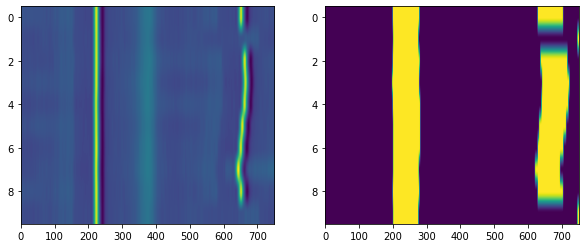

In [2]:
# Versión que carga los ficheros segun se piden y sigue tomando un numero fijo de ventanas temporales
 
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math
import scipy.io
import os
import math
import matplotlib.pyplot as plt
 
# Estos son los diagnósticos que servían para puntuar en el PhysioNet, pero en el dataset hay mas
 
tabla = {270492004:0, 164889003:1, 164890007:2, 426627000:3, 
         713427006:4, 713426002:5, 445118002:6, 39732003:7, 
         164909002:8, 251146004:9, 698252002:10, 10370003:11,
         284470004:12, 427172004:13, 164947007:14, 111975006:15,
         164917005:16, 47665007:17, 59118001:18, 427393009:19, 
         426177001:20, 426783006:21, 427084000:22, 63593006:23,
         164934002:24, 59931005:25, 17338001:26}
 
# Estos son todos los diagnósticos que pueden aparecer en el dataset
 
tabla_completa = {270492004:0, 195042002:1, 164951009:2, 426664006:3, 57054005:4, 413444003:5,
                  426434006:6, 54329005:7, 251173003:8, 164889003:9, 195080001:10, 164890007:11,
                  195126007:12, 251268003:13, 713422000:14, 29320008:15, 233917008:16, 251170000:17,
                  74615001:18, 426627000:19, 6374002: 20, 698247007:21, 426749004:22, 413844008:23,
                  27885002:24, 713427006:25, 204384007:26, 53741008:27, 77867006:28, 82226007:29,
                  428417006:30, 13640000:31, 84114007:32, 368009:33, 251259000:34, 49260003:35,
                  251120003:36, 713426002:37, 251200008:38, 425419005:39, 704997005:40, 426995002:41,
                  251164006:42, 426648003:43, 425623009:44, 445118002:45, 253352002:46, 67741000119109:47,
                  446813000:48, 39732003:49, 164909002:50, 445211001:51, 164873001:52, 370365005:53,
                  251146004:54, 54016002:55, 164865005:56, 164861001:57, 698252002:58, 428750005:59,
                  164867002:60, 10370003:61, 251182009:62, 282825002:63, 67198005:64, 425856008:65,
                  284470004:66, 427172004:67, 17338001:68, 164947007:69, 111975006:70, 164917005:71,
                  164921003:72, 314208002:73, 253339007:74, 446358003:75, 47665007:76, 59118001:77,
                  89792004:78, 55930002:79, 49578007:80, 65778007:81, 427393009:82, 426177001:83,
                  60423000:84, 426783006:85, 427084000:86, 429622005:87, 164931005:88, 164930006:89,
                  251168009:90, 63593006:91, 426761007:92, 251139008:93, 164934002:94, 59931005:95,
                  266257000:96, 164937009:97, 11157007:98, 164884008:99, 75532003:100, 81898007:101,
                  164896001:102, 111288001:103, 266249003:104, 251266004:105, 195060002:106, 164895002:107,
                  251180001:108, 195101003:109, 74390002:110}
 
def convertCatToLabel(y):
  #labels = np.zeros((1, 111), dtype=np.int64)
  labels = np.zeros((1, 27), dtype=np.int64)
  for i in range(y.shape[1]):
    if y[0,i] in tabla.keys():                #Si la patología es una de las 27 pongo a 1 la misma en el vector de 27 componentes
      labels[0,tabla[int(y[0,i])]]=1
    #labels[0,tabla_completa[int(y[0,i])]]=1
  return labels
 
 
class ECG_Dataset_same2(Dataset):
 
  def __init__(self):
    # data loading
    path = '/content/drive/MyDrive/TFG/Tensores_procesados_CPS_1_6_2021'
    # Generamos lista iterable de ficheros
    files = []
    with open('/content/drive/MyDrive/TFG/Tensores_procesados_CPS_1_6_2021/NombresFicheros.txt', 'r') as texto:
      lines = texto.readlines()
      for l in lines:
        as_list = l.split("\n")
        files.append(as_list[0])
        
      #print(files)
    
    x_list = []
    y_list = []
    
    self.files_list = files  
    self.x = x_list
    self.y = y_list
    self.n_samples = len(files)
    
 
  def __getitem__(self, index):
    path = '/content/drive/MyDrive/TFG/Tensores_procesados_CPS_1_6_2021'
    xy = scipy.io.loadmat(path+'/'+self.files_list[index])
    #print(self.files_list[index])
    matrices = xy['tensor']
    diagnostico = (xy['diagnostico'])
    
    x_n = matrices        
    y_n = convertCatToLabel(diagnostico)
 
    n = 10;                               # numero de ventanas temporales a tomar
    t = x_n.shape[1]
    
    #rep = (n/t)
    rep = (t/n)
    #print(t, rep)
    
    if rep>=1:                            # Si tengo suficientes ventanas las cojo
      if n==t:
        ind= 0
      else:
        ind = np.random.randint(0, t-n)   # Podríamos haber cogido un trozo de la señal especialmente significativo, en vez de aleatorio
      
      #print("Cojo tramo de "+str(ind)+" hasta "+str(ind+n))
      return x_n[:, ind:ind+n, :], y_n
 
    else:                                 # Si no hay suficientes tengo que concatenar datos repetidos
      #print("Hay que concatenar")
      res = x_n
      #print("Tamaño inicial: "+ str(res.shape[1]))
      while (res.shape[1]<=n):
        #print("Entro al while")
        res = np.concatenate((x_n, res), axis=1)
        #print("NUEVO Tamaño tensor: "+ str(res.shape[1]))
      #print(res.shape[1])
      #print(n)
      ind = np.random.randint(0, res.shape[1]-n)
      return res[:, ind:ind+n,:] , y_n
 
 
    
 
  def __len__(self):
    return self.n_samples
 
 
dataset = ECG_Dataset_same2()
dataloader = DataLoader(dataset=dataset, batch_size=4, shuffle=True, num_workers=2)
 
dataIterator = iter(dataloader)
data = dataIterator.next()    
features, labels = data
print(features.shape, labels.shape)
fig = plt.figure(figsize=(10, 4))
fig.add_subplot(1, 2, 1)
plt.imshow(features[0,0,:,:])
plt.axis("tight")
fig.add_subplot(1,2,2)
plt.imshow(features[0,12,:,:])
plt.axis("tight")
print(labels[0,0,:])

In [ ]:
!nvidia-smi

Tue Jun  8 20:22:32 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
# Primer modelo sencillo de red con 3 capas convolucionales y 3 lineales.       Batch de dimensiones 32x15xHx750
import numpy as np
import torch.nn.functional as F
import torch
 
class CardioNet3C3L(torch.nn.Module):
  def __init__(self):
    super(CardioNet3C3L, self).__init__()
    self.conv1 = torch.nn.Conv2d(15,32, kernel_size=5, padding=2, stride=(1, 4))
    self.batchN1 = torch.nn.BatchNorm2d(32)
    self.conv2 = torch.nn.Conv2d(32,64, kernel_size=5, padding=2, stride=(1, 4))
    self.batchN2 = torch.nn.BatchNorm2d(64)
    self.conv3 = torch.nn.Conv2d(64,128, kernel_size=3, padding=1, stride=(2, 4))
    self.batchN3 = torch.nn.BatchNorm2d(128)

    self.drop = torch.nn.Dropout(0.5)

    self.lin1 = torch.nn.Linear(128*12, 512, bias=True)
    self.batchN4 = torch.nn.BatchNorm1d(512)
    self.lin2 = torch.nn.Linear(512, 27, bias=True)
    self.batchN5 = torch.nn.BatchNorm1d(27)
 
  def forward(self, x):
    x = F.relu(self.batchN1(self.conv1(x)))
    #print(x.shape)
    x = F.relu(self.batchN2(self.conv2(x)))
    #print(x.shape)
    x = F.relu(self.batchN3(self.conv3(x)))
    #print(x.shape)
    x = torch.mean(x, 2)                # Elimino la dimensión de las ventanas con un average pooling
    x = self.drop(x)
    #print(x.shape)
    x = torch.reshape(x, (32, 128*12))  # Elimino la última dimensión con un reshape
    #print(x.shape)
    x = F.relu(self.batchN4(self.lin1(x)))    
    #print(x.shape)
    x = self.batchN5(self.lin2(x))
    
    #x = torch.sigmoid(x)    # Previa a la sigmoide
    return x
  def predict(self, x):
    x = F.relu(self.batchN1(self.conv1(x)))
    x = F.relu(self.batchN2(self.conv2(x)))
    x = F.relu(self.batchN3(self.conv3(x)))
    x = torch.mean(x, 2)                # Elimino la dimensión de las ventanas con un average pooling
    x = self.drop(x)
    x = torch.reshape(x, (32, 128*12))  # Elimino la última dimensión con un reshape
    x = F.relu(self.batchN4(self.lin1(x)))    
    x = self.batchN5(self.lin2(x))
    x = torch.sigmoid(x)
    return x
    
model = CardioNet3C3L()
J = torch.nn.BCEWithLogitsLoss()
np_tensor = np.random.random((32,15,10,750))
tensor_prueba = torch.tensor(np_tensor, dtype=torch.float32)
print(tensor_prueba.shape)
o = model(tensor_prueba)
print(o.shape)

torch.Size([32, 15, 10, 750])
torch.Size([32, 27])


In [5]:
# Intento de utilizar la red con el dataloader para hacer un pequeño entrenamiento
import matplotlib.pyplot as plt
 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CardioNet3C3L()
optim = torch.optim.Adam(model.parameters(), lr=0.0001)
J = torch.nn.BCEWithLogitsLoss()
dataset = ECG_Dataset_same2()

In [ ]:

dataloader = DataLoader(dataset=dataset, batch_size=32, shuffle=True, num_workers=2, drop_last=True)
dataIterator = iter(dataloader)
model.zero_grad()
model.to(device)
 
epochs = 100      # Para garantizar coger mas de 6877 ficheros (pero no garantizo que no repita, o que alguno nunca lo coja??)
costes = []
costes_epoch = []
for epoch in range(epochs):
  print('Epoch: '+ str(epoch))
  costes_epoch = []
  dataIterator = iter(dataloader)
  for features, labels in dataIterator:
    features = features.to(device)
    o = model(features)
    #print(o.shape)
    y = torch.reshape(labels,(32,27))
    y = torch.tensor(y, device = device, dtype=torch.float32)
    coste = J(y,o)
    model.zero_grad()
    coste.backward()
    optim.step()
    costes_epoch.append(coste.cpu())
    print(coste.cpu())
  coste_epoch = torch.mean(costes_epoch)
  print(epoch, coste_epoch)
  costes.append(coste_epoch)

In [ ]:
# Guardamos modelo

torch.save(model.state_dict(), path)


In [6]:
# Para cargar modelo usaríamos 
path = '/content/drive/MyDrive/TFG/Modelos/model_0'
model.load_state_dict(torch.load(path))

<All keys matched successfully>

Text(0.5, 1.0, 'Coste por batch')

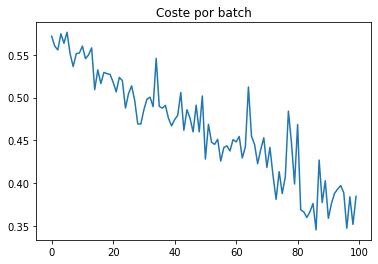

In [ ]:
plt.plot(costes)
plt.title('Coste por batch')

In [11]:
# Probamos red
dataset = ECG_Dataset_same2()
dataloader = DataLoader(dataset=dataset, batch_size=32, shuffle=True, num_workers=2)

dataIterator = iter(dataloader)
data = dataIterator.next()    
features, labels = data
o = model.predict(features)
print(o[0,0:].detach())
print(labels[0,0:])

tensor([0.7266, 0.9524, 0.3444, 0.3705, 0.4013, 0.3632, 0.5051, 0.1231, 0.6715,
        0.8008, 0.1556, 0.5238, 0.7005, 0.3331, 0.4058, 0.3253, 0.7085, 0.1831,
        0.9999, 0.2871, 0.9164, 0.6291, 0.0813, 0.2869, 0.7386, 0.3237, 0.6351])
tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
         0, 0, 0]])
